# Türkiye'de en çok Üretimi ve Tüketimi Yapılan Enerji Kaynakları/Türleri
- Veriler, Uluslararası Enerji Ajansı'nın (IEA) web sitesinden, özellikle de "iea.org/data-and-statistics/data-tools/monthly-electricity-statistics" adresinde bulunan Aylık Elektrik İstatistikleri aracından toplanmıştır.
- Projedeki asıl amaç Türkiye'de bulunan enerji kaynaklarının tanınması ve veri görselleştirmesinin yapılması hedeflenmektedir.
- IEA tarafından elde ettiğimiz aylık elektrik istatistik veri seti üzerinden en çok kullanılan kaynakları görselleştirilmesi hedeflenmektedir.


In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [113]:
df = pd.read_csv('data.csv')

In [114]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [116]:
df.shape

(181915, 12)

In [117]:
df.isnull().sum(axis=0)

COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

### 'data.csv' dataset içinde bulunan kolonların açıklamaları & veri keşfi
- <b>COUNTRY</b>: Ülkenin adı
- <b>CODE_TIME</b>: Ayı ve yılı temsil eden bir kod (örneğin, Ocak 2010 için JAN2010)
- <b>TIME</b>: İnsanlar tarafından daha okunabilir biçimde ay ve yıl (örneğin, Ocak 2010)
- <b>YEAR</b>: Verilerin yılı
- <b>MONTH</b>: Rakam olarak verinin ayı (1-12)
- <b>MONTH_NAME</b>: Dizi olarak verinin ayı (örneğin, Ocak)
- <b>PRODUCT</b>: Enerji ürününün türü (örneğin, Hidroelektrik, Rüzgar, Güneş)
- <b>VALUE</b>: Gigawatt-saat (GWh) cinsinden üretilen elektrik miktarı
- <b>DISPLAY_ORDER</b>: Ürünlerin görüntülenmesi gereken sıra
- <b>yearToDate</b>: GWh cinsinden cari yıl için cari aya kadar üretilen elektrik miktarı
- <b>previousYearToDate</b>: Bir önceki yıl için içinde bulunulan aya kadar üretilen elektrik miktarı GWh cinsinden
- <b>share</b>: Ürünün ülke için toplam elektrik üretimi içindeki ondalık biçimdeki payı.

>Kategorik Değişkenler
- COUNTRY
- CODE_TIME
- TIME
- MONTH_NAME
- PRODUCT
>Rakamsal Değişkenler
- YEAR
- MONTH
- VALUE
- DISPLAY_ORDER
- yearToDate
- previousYearToDate
- share

In [118]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate'], axis=1, inplace=True)

In [119]:
df.rename(columns={'COUNTRY': 'country',
                   'YEAR': 'year',
                   'MONTH': 'month',
                   'MONTH_NAME': 'month_name',
                   'PRODUCT': 'product',
                   'VALUE': 'value'},
          inplace=True)

In [120]:
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

In [121]:
filt = (df['country'] == 'Republic of Turkiye')
df = df.loc[filt]

In [122]:
df.head()

,country,year,month,month_name,product,value,share,datetime
763,Republic of Turkiye,2010,1,January,Hydro,4186.449,0.248737,2010-01-01
764,Republic of Turkiye,2010,1,January,Wind,240.631,0.014297,2010-01-01
765,Republic of Turkiye,2010,1,January,Solar,0.000,0.000000,2010-01-01
766,Republic of Turkiye,2010,1,January,Geothermal,45.985,0.002732,2010-01-01
767,Republic of Turkiye,2010,1,January,Other renewables,0.000,0.000000,2010-01-01


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094 entries, 763 to 181708
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     4094 non-null   object        
 1   year        4094 non-null   int64         
 2   month       4094 non-null   int64         
 3   month_name  4094 non-null   object        
 4   product     4094 non-null   object        
 5   value       4094 non-null   float64       
 6   share       4094 non-null   float64       
 7   datetime    4094 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 287.9+ KB


In [124]:
filt = (df['product'] == 'Net electricity production')
df_net = df.loc[filt]

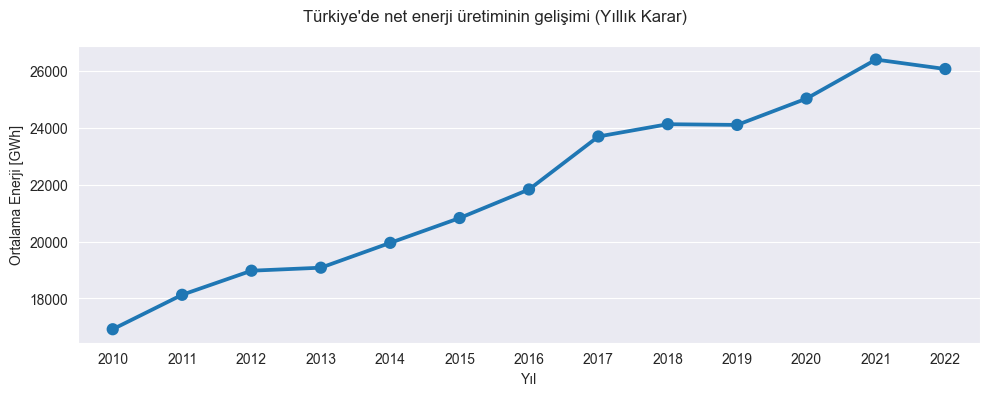

In [125]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle("Türkiye'de net enerji üretiminin gelişimi (Yıllık Karar)")

sns.pointplot(data=df_net, x='year', y='value', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Yıl')
ax.set_ylabel('Ortalama Enerji [GWh]')

plt.tight_layout()

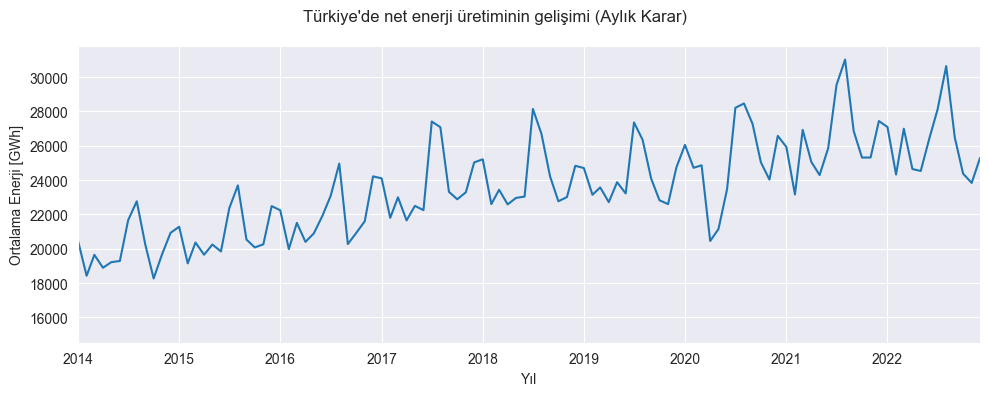

In [126]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle("Türkiye'de net enerji üretiminin gelişimi (Aylık Karar)")

sns.lineplot(data=df_net[['datetime', 'value']], x='datetime', y='value')
ax.set_xlabel('Yıl')
ax.set_ylabel('Ortalama Enerji [GWh]')
ax.set_xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2022-12-01'))

plt.tight_layout()

In [127]:
filt = ['Wind', 'Solar', 'Others', 'Total combustible fuels', 'Nuclear', 'Natural gas', 'Hydro', 'Coal', 'Oil',
        'Other renewables']


df_gen = df[df['product'].isin(filt)]

df_gen['product'].replace({"Wind": "Rüzgar Gülü"}, inplace=True)
df_gen['product'].replace({"Solar": "Güneş Enerjisi"}, inplace=True)
df_gen['product'].replace({"Others": "Diğerleri"}, inplace=True)
df_gen['product'].replace({"Total combustible fuels": "Toplam yanıcı yakıtlar"}, inplace=True)
df_gen['product'].replace({"Nuclear": "Nükleer Enerji"}, inplace=True)
df_gen['product'].replace({"Natural gas": "Doğal Gaz"}, inplace=True)
df_gen['product'].replace({"Hydro": "Hidro"}, inplace=True)
df_gen['product'].replace({"Coal": "Kömür"}, inplace=True)
df_gen['product'].replace({"Oil": "Petrol"}, inplace=True)
df_gen['product'].replace({"Other renewables": "Diğer yenilenebilirler "}, inplace=True)

In [128]:
df_gen.head()

,country,year,month,month_name,product,value,share,datetime
763,Republic of Turkiye,2010,1,January,Hidro,4186.449,0.248737,2010-01-01
764,Republic of Turkiye,2010,1,January,Rüzgar Gülü,240.631,0.014297,2010-01-01
765,Republic of Turkiye,2010,1,January,Güneş Enerjisi,0.000,0.000000,2010-01-01
767,Republic of Turkiye,2010,1,January,Diğer yenilenebilirler,0.000,0.000000,2010-01-01
768,Republic of Turkiye,2010,1,January,Nükleer Enerji,0.000,0.000000,2010-01-01


In [129]:
df_gen = df_gen.drop('datetime', axis=1)
matrix = df_gen.groupby('product').sum()['value'].sort_values(ascending=False)
matrix

product
Toplam yanıcı yakıtlar     2.287827e+06
Doğal Gaz                  1.164111e+06
Kömür                      1.077200e+06
Hidro                      8.043130e+05
Rüzgar Gülü                2.031244e+05
Güneş Enerjisi             5.997132e+04
Diğerleri                  2.419944e+04
Petrol                     1.513598e+04
Diğer yenilenebilirler     0.000000e+00
Nükleer Enerji             0.000000e+00
Name: value, dtype: float64

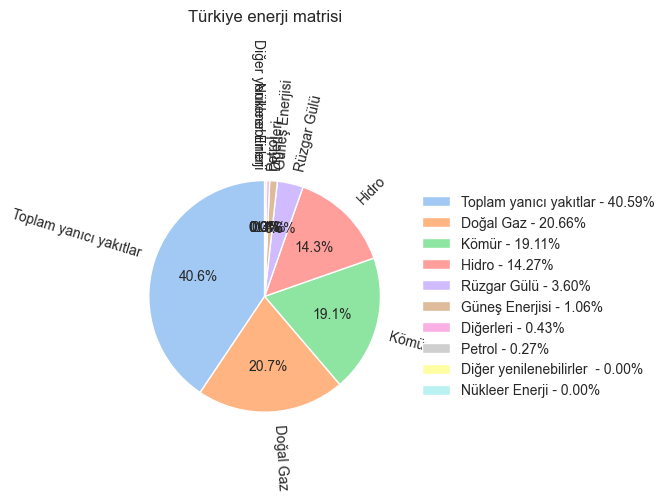

In [130]:
labels = matrix.index

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Türkiye enerji matrisi')

ax.pie(x=matrix, labels=labels, autopct='%1.1f%%', rotatelabels=True,startangle=90, colors=sns.color_palette("pastel"));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["{} - {:.2f}%".format(i,j/sum(matrix)*100) for i,j in zip(labels,matrix)], frameon=False)

plt.tight_layout()

In [131]:
filt = ['Coal', 'Natural gas', 'Total combustible fuels', 'Hydro']
df_notren = df[df['product'].isin(filt)]

df_notren = df_notren.drop('country', axis=1)
df_notren = df_notren.drop('month_name', axis=1)

df_notren['product'].replace({"Coal": "Kömür"}, inplace=True)
df_notren['product'].replace({"Natural gas": "Doğal Gaz"}, inplace=True)
df_notren['product'].replace({"Total combustible fuels": "Toplam yanıcı yakıtlar"}, inplace=True)
df_notren['product'].replace({"Hydro": "Hidro"}, inplace=True)

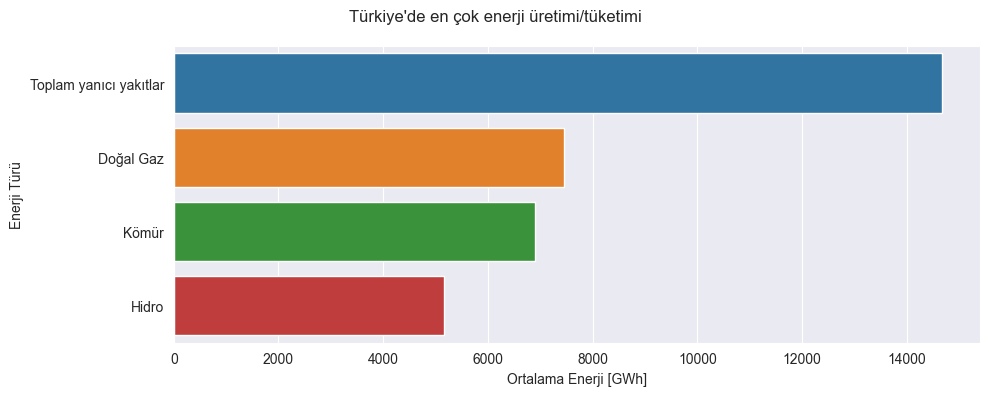

In [132]:
order = df_notren.groupby('product').mean()['value'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle("Türkiye'de en çok enerji üretimi/tüketimi")

sns.barplot(data=df_notren, x='value', y='product', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Ortalama Enerji [GWh]')
ax.set_ylabel('Enerji Türü')

plt.tight_layout()